## Historia de Usuario
Como um profissional de saúde, quero um modelo de machine learning para prever a probabilidade de diabetes em pacientes com o objetivo de oferecer intervenções adequadas.

### Critérios de Aceitação:

1. **Preprocessamento de Dados**:
    - O sistema deve lidar com valores ausentes e dados atípicos.
    - Normalizar características numéricas.
    - Codificar variáveis categóricas, se necessário.

2. **Predição**:
    - Permitir a entrada de dados personalizados para predições individuais.
    - As entradas devem incluir: Gravidez, Glicose, Pressão Arterial, Espessura da Pele, Insulina, IMC, Função Pedigria de Diabetes, Idade.
    - Fornecer a probabilidade de diabetes baseada nos dados de entrada.

In [1]:
from src.preprocessor import DataPreprocessor
from src.data_loader import DataLoader
from src.trainer import ModelTrainer
from src.evaluator import ModelEvaluator
from src.models import Models

import streamlit

In [2]:
'''Load the data from diabetes dataset and print the first 5 rows'''

file_path = "data/datasets/diabetes.csv"
loader = DataLoader(file_path)
loader.load_data()
loader.print_data(5)


Correcly loaded dataset from data/datasets/diabetes.csv
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


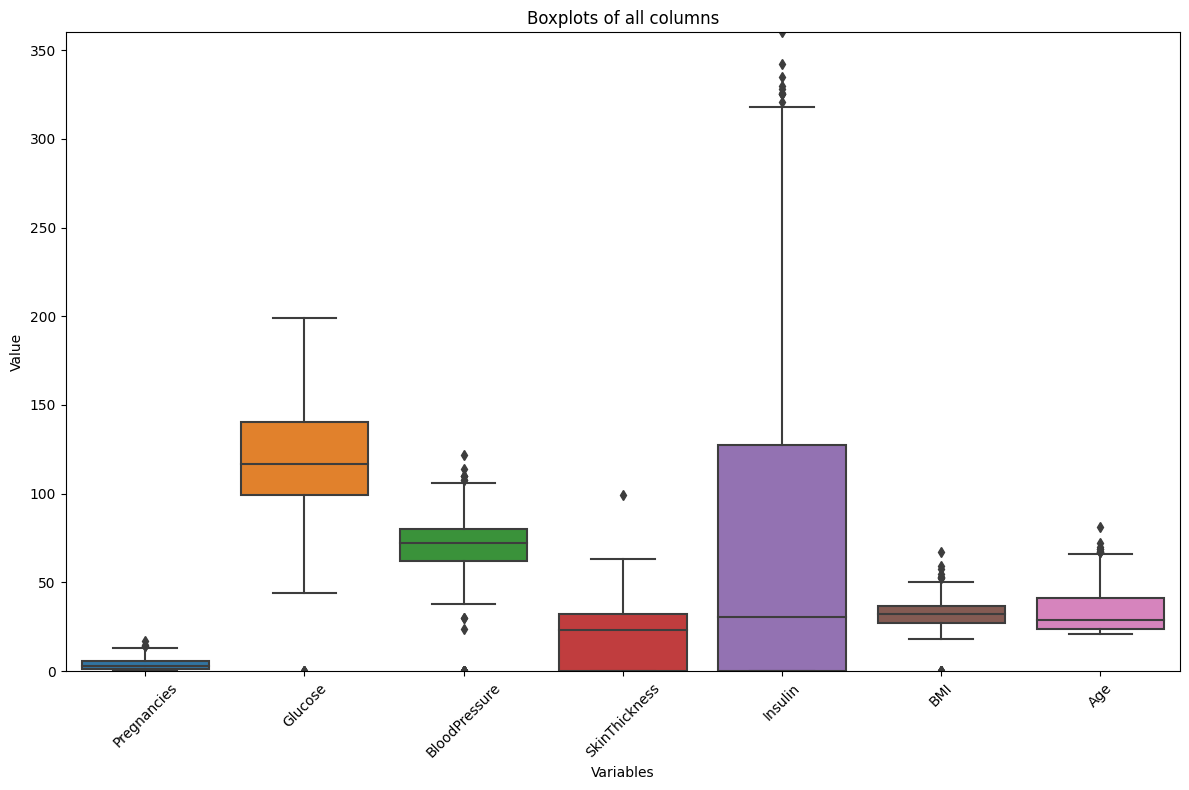

In [3]:
loader.plot_boxplot_all(ignore_columns=['Outcome', 'DiabetesPedigreeFunction'])

In [4]:
loader.show_basic_info()

Shape of the dataset: (768, 9)
Columns: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [5]:
'''Get the data to apply further processing and training'''
data = loader.get_data()

In [6]:
preprocessor = DataPreprocessor(data)

In [7]:
'''Here is made the data preprocessing, the following steps are executed:
1. Handling missing values
2. Handling outliers
3. Normalizing data
4. Encoding categorical variables (Implemented but not necessary for this dataset)

'''

data = preprocessor.handle_missing_values()

data = preprocessor.handle_outliers()

data = preprocessor.normalize_data(target_column='Outcome')

data = preprocessor.encode_categorical_variables()

X_train, X_test, y_train, y_test = preprocessor.split_data(test_size=0.2, target_column='Outcome')

Missing values handled successfully.
Column 'Pregnancies' has 4 outliers.
Column 'Glucose' has 5 outliers.
Column 'BloodPressure' has 45 outliers.
Column 'SkinThickness' has 1 outliers.
Column 'Insulin' has 27 outliers.
Column 'BMI' has 10 outliers.
Column 'DiabetesPedigreeFunction' has 29 outliers.
Column 'Age' has 11 outliers.
Column 'Outcome' has no outliers.
132 outliers removed successfully.
Categorical variables encoded successfully.


In [8]:
model_manager = Models()

all_models = model_manager.get_all_models()

print("Models available for training:")
for model_name in all_models:
    print(model_name)

Models available for training:
logistic_regression
sgd_classifier
random_forest
gradient_boosting
ada_boost
svc
knn
decision_tree
naive_bayes
lda
qda


In [9]:
'''
Here is defined the hyperparameters grid for some models. The grid is used to search for the best hyperparameters for each model.
After the grid is defined, the ModelTrainer class is used to train all the purposed models and the ModelEvaluator class is used to evaluate the models.
'''

param_grid = {
    'logistic_regression': {'C': [0.1, 1, 10]},
    'random_forest': {'n_estimators': [50, 100, 200]},
    'svc': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'knn': {'n_neighbors': [3, 5, 7]},
    'decision_tree': {'max_depth': [3, 5, 7]},
    'gradient_boosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]}
}

trainer = ModelTrainer(all_models, X_train, y_train)
for model_name, params in param_grid.items():
    print(f"Optimizing hyperparameters for {model_name}...")
    trainer.optimize_hyperparameters(model_name, X_train, y_train, params, search_method='grid')

trained_models = trainer.train()

evaluator= ModelEvaluator(trained_models, X_test, y_test)
results = evaluator.evaluate()
evaluator.print_results(results)

Optimizing hyperparameters for logistic_regression...
Best parameters for logistic_regression: {'C': 0.1}
Optimizing hyperparameters for random_forest...
Best parameters for random_forest: {'n_estimators': 100}
Optimizing hyperparameters for svc...
Best parameters for svc: {'C': 0.1, 'kernel': 'linear'}
Optimizing hyperparameters for knn...
Best parameters for knn: {'n_neighbors': 7}
Optimizing hyperparameters for decision_tree...
Best parameters for decision_tree: {'max_depth': 5}
Optimizing hyperparameters for gradient_boosting...
Best parameters for gradient_boosting: {'learning_rate': 0.1, 'n_estimators': 100}

Training models...

Training complete.


Evaluating models...
Results for logistic_regression:
Accuracy: 0.734375
Precision: 0.7121394230769231
Recall: 0.734375
F1 Score: 0.7159438775510205


Results for sgd_classifier:
Accuracy: 0.7578125
Precision: 0.7388546634870164
Recall: 0.7578125
F1 Score: 0.7257354308021192


Results for random_forest:
Accuracy: 0.7265625
Precision: 

In [10]:
'''
This block is for test purposes only, it uses the predict method to make predictions on new data using one of the trained models

'''

input_data = [
    [5, 116, 74, 0, 0, 25.6, 0.201, 30],  
    [3, 78, 50, 32, 88, 31.0, 0.248, 26],  
    [10, 115, 0, 0, 0, 35.3, 0.134, 29],
    [2, 197, 70, 45, 543, 30.5, 0.158, 53],
    [8, 125, 96, 0, 0, 0.0, 0.232, 54],
    [4, 110, 76, 20, 100, 28.4, 0.118, 27]

]
model_name = "decision_tree" 
prediction = evaluator.predict(model_name, input_data)
print(f"Prediction for input data {input_data} using model '{model_name}': {prediction}")

Normalizing input data...
Prediction for input data [[5, 116, 74, 0, 0, 25.6, 0.201, 30], [3, 78, 50, 32, 88, 31.0, 0.248, 26], [10, 115, 0, 0, 0, 35.3, 0.134, 29], [2, 197, 70, 45, 543, 30.5, 0.158, 53], [8, 125, 96, 0, 0, 0.0, 0.232, 54], [4, 110, 76, 20, 100, 28.4, 0.118, 27]] using model 'decision_tree': [0. 0. 1. 1. 0. 0.]


## Deployment of the Solution

The solution is deployed as a web application using Streamlit. The steps are:

1. **Develop the Web App**: An interactive interface is created with Streamlit.
2. **Load Trained Models**: Models are loaded from the `data/models/` directory.
3. **Input Data**: Users input the required features (Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age).
4. **Get Predictions**: The app provides predictions based on the selected model.

In [11]:
'''
This block executes the streamlit app, that allows the user to load the models and make predictions on new data

'''
import os 

#os.system("streamlit run src/streamlit_app.py")
